# Logistic Regression


In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import sklearn
from Functions import prepro
import warnings

import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


random.seed(0)

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)
warnings.filterwarnings('ignore')

In [2]:
X = pd.concat([pd.read_csv("../MakeFeaturesForStacking/Train/train_feature_{}.csv".format(i)) for i in range(1, 20)], axis=1)
test_X = pd.concat([pd.read_csv("../MakeFeaturesForStacking/Test/test_feature_{}.csv".format(i)) for i in range(1, 20)], axis=1)
print(X.shape)
print(test_X.shape)

(132250, 38)
(28340, 38)


In [3]:
y = pd.read_csv("../../data/Processed/train2.csv", usecols=["y"]).values
y = np.append(y, 1-y)
print(y.shape)

(132250,)


In [4]:
# 全データを5つに分割
random.seed(random.randint(0, 10000))
SIZE = X.shape[0]
K = 5

folds = prepro.make_kfolds(SIZE, K)
print(len(folds))
for i, fold in enumerate(folds):
    print("fold ", i+1, " size is ", len(fold))
    
    
if SIZE != len(set(sum(folds, []))):
    print("error is occuring in spliting")
else :
    print("successfully split")

5
fold  1  size is  26450
fold  2  size is  26450
fold  3  size is  26450
fold  4  size is  26450
fold  5  size is  26450
successfully split


In [5]:
THRESHOLD = 0.50
models = []
cv_scores = []
temp = 0
train_pred = []

all_indices = sum(folds, [])
for i in range(K):
    print("======================== fold {} ========================".format(i+1))
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y[train_indices].reshape(-1, 1)
    valid_X = X.iloc[valid_indices].values
    valid_y = y[valid_indices].reshape(-1, 1)
    
    
    model = LogisticRegression(random_state=0)
    
    model.fit(train_X, train_y)

    
    pred = 1-model.predict_proba(valid_X)[:, :1]
    
    train_pred.append(pred)
    pred = np.where(pred < THRESHOLD, 0, 1)
    temp += np.sum(pred)
    
    score = accuracy_score(pred, valid_y)
    print(score)
    
    models.append(model)
    cv_scores.append(score)
    
    
print("cv score : ", np.mean(cv_scores))    
print("cv ratio : ", temp / SIZE)

======================== fold 1 ========================
0.49697542533081285
======================== fold 2 ========================
0.4956521739130435
======================== fold 3 ========================
0.5060869565217392
======================== fold 4 ========================
0.5001134215500945
======================== fold 5 ========================
0.5012098298676748
cv score :  0.500007561436673
cv ratio :  7.561436672967864e-06


0.4979644066817845
0.4978768113405648
0.4981720892289783
0.4979417332839624
0.4981165502617208
0.49801431815940217


array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

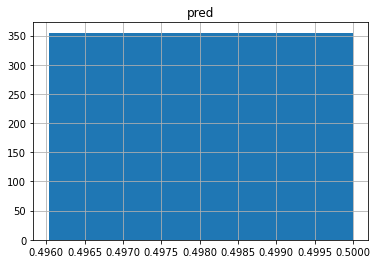

In [6]:
preds = []

for i in range(K):
    model = models[i]
    pred = 1-model.predict_proba(test_X)[:, :1].reshape(-1,)
    preds.append(pred)
    print(np.sum(pred) / pred.shape[0])
    
preds = np.array(preds)
preds = np.mean(preds, axis=0)
print(np.sum(preds) / preds.shape[0])


temp = pd.DataFrame({"pred":preds})
temp.hist(bins=80)

In [7]:
preds = np.where(preds < THRESHOLD, 0, 1)
print(np.sum(preds) / preds.shape[0])

submit_df = pd.DataFrame({'y': preds})
submit_df.index.name = 'id'
#submit_df.to_csv('../Submissions/submission_LR_stacking_1_{}.csv'.format(K))

3.5285815102328866e-05


In [ ]:
temp = np.where(np.mean(test_X.values, axis=1) < THRESHOLD, 0, 1)

In [ ]:
submit_df = pd.DataFrame({'y': temp})
submit_df.index.name = 'id'
# submit_df.to_csv('../Submissions/submission_cat_mean.csv')
np.sum(temp) /  temp.shape[0]

In [ ]:
lbl = np.where(np.mean(X.values, axis=1) < THRESHOLD, 0, 1)

In [ ]:
for i in range(K):
    print("======================== fold {} ========================".format(i+1))
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y[train_indices].reshape(-1, 1)
    valid_X = X.iloc[valid_indices].values
    valid_y = y[valid_indices].reshape(-1, 1)
    valid_X = np.where(np.mean(valid_X, axis=1) < THRESHOLD, 0, 1)
    print(accuracy_score(valid_X, valid_y))